# Decision Tree Classifier - Implementation on Iris Dataset

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pickle
%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [3]:
# Loading the dataset
iris = load_iris()

In [4]:
# Independent Features
X = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [5]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
# Target Class
y = iris.target

In [8]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

In [9]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Sample Model Training

In [10]:
sample_model = DecisionTreeClassifier(random_state=)
# Fiting model to data
sample_model.fit(X_train, y_train)
# Getting Predictions
y_pred = sample_model.predict(X_test)

## Visualizing the Decision Tree

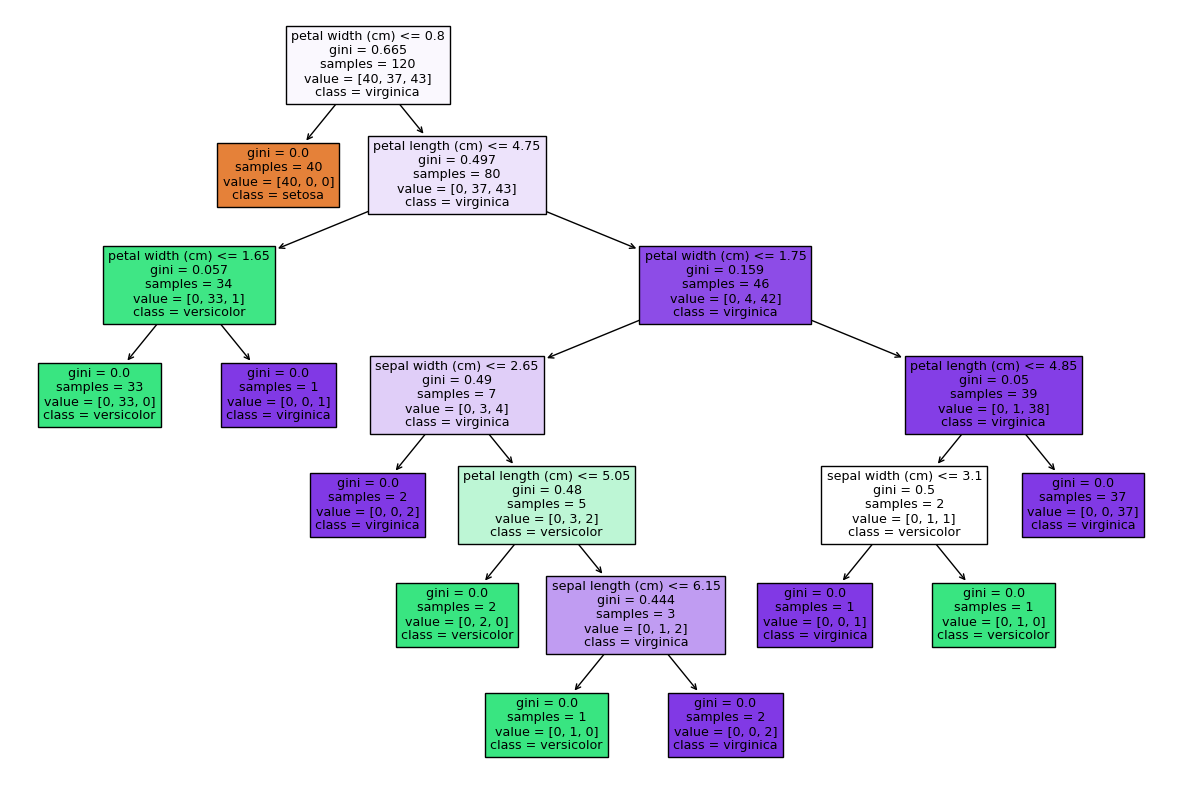

In [11]:
plt.figure(figsize=(15,10))
tree.plot_tree(sample_model, feature_names=iris.feature_names, class_names=list(iris.target_names), filled=True);

## Sample Model Scores

In [13]:
print("Accuracy:", accuracy_score(y_test, y_pred), end="\n\n")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred), sep="\n\n", end="\n\n")
print("Classification Report:", classification_report(y_test, y_pred), sep="\n\n")

Accuracy: 0.9666666666666667

Confusion Matrix:

[[10  0  0]
 [ 0 12  1]
 [ 0  0  7]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        13
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



# Hyperparameter Tuning

In [14]:
# Parameter Grid for Hyperparameter tuning
param_grid = {  'criterion' : ["gini", "entropy", "log_loss"],
                'splitter' : ["best", "random"],
                'max_depth' : [None, 1, 2, 3, 4, 5],             # Pre-pruning; but does not work with None
                'max_features' : [None, "auto", "sqrt", "log2"]}

In [15]:
# Initializing grid
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=param_grid, n_jobs=-1, scoring='accuracy')

In [16]:
# Fitting the model
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [17]:
# Best Parameters
grid.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': None,
 'splitter': 'random'}

In [18]:
# Best score
grid.best_score_

0.975

In [25]:
# Best Model
model = grid.best_estimator_
model

DecisionTreeClassifier(criterion='log_loss', max_depth=5, splitter='random')

## Visualizing the Decision Tree

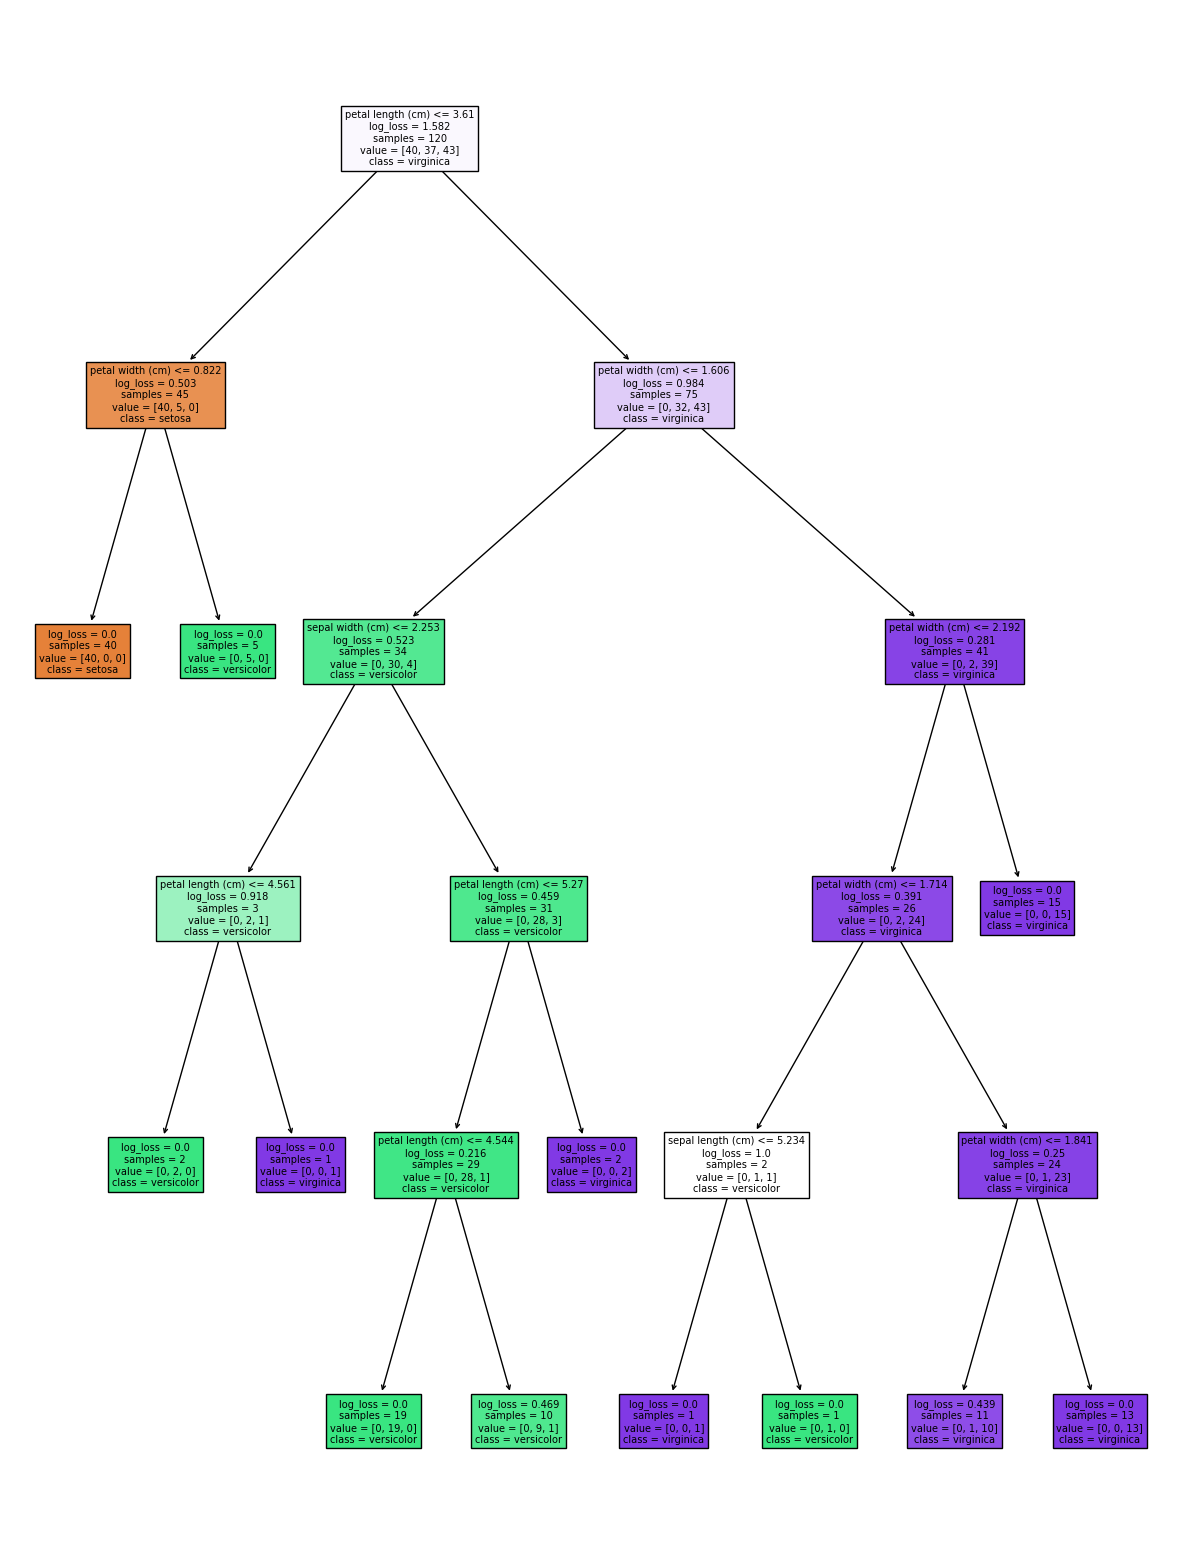

In [20]:
plt.figure(figsize=(15,20))
tree.plot_tree(model, feature_names=iris.feature_names, class_names=list(iris.target_names), filled=True);

## Model Scores

In [21]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred), end="\n\n")
print("Confusion Matrix:", confusion_matrix(y_test, y_pred), sep="\n\n", end="\n\n")
print("Classification Report:", classification_report(y_test, y_pred), sep="\n\n")

Accuracy: 1.0

Confusion Matrix:

[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# Model Pickling

In [31]:
with open('Models/decision_tree_classifier.pkl', 'wb') as file:
    pickle.dump(model, file)